### FIGURE 3A
© 2021. This work is licensed under a CC-BY-NC-SA license. 
"Thalamo-cortical spiking model of incremental learning combining perception, context and NREM-sleep-mediated noise-resilience"
Authors: Bruno Golosio, Chiara De Luca, Cristiano Capone, Elena Pastorelli, Giovanni Stegel, Gianmarco Tiddia, Giulia De Bonis and Pier Stanislao Paolucci
arxiv.2003.11859

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

%matplotlib inline

In [3]:
home = os.getcwd()
loading_path = home + '/Data/Fig3_set10/'

evt_cx = sio.loadmat(loading_path + 'events.mat')['evt_exc'][0]/1000.
evt_th = sio.loadmat(loading_path + 'events.mat')['evt_th'][0]/1000.
evt_inh = sio.loadmat(loading_path + 'events.mat')['evt_inh'][0]/1000.

W_inh_exc = -64.


weight1 = sio.loadmat(loading_path + 'weights_PreSleep_0.mat')['w_inp_exc']
weight_cx1_Pre = sio.loadmat(loading_path + 'weights_PreSleep_0.mat')['w_exc_exc']
weight_cx1_Post = sio.loadmat(loading_path + 'weights_PostSleep_0.mat')['w_exc_exc']



In [4]:
loading_path = home + '/Data/Fig3_set10/'

m_V = sio.loadmat(loading_path + 'multimeter.mat')['V'][0]
m_t = sio.loadmat(loading_path + 'multimeter.mat')['times'][0]/1000.
m_w = sio.loadmat(loading_path + 'multimeter.mat')['w'][0]
m_idx = sio.loadmat(loading_path + 'multimeter.mat')['senders'][0]
m_idx = m_idx - np.min(m_idx)


4955600
[5.0000e+01 5.0000e+01 5.0000e+01 ... 6.1945e+05 6.1945e+05 6.1945e+05]
4955600
4955600
[ 17  53  89 ... 304 340 376]


In [4]:
# Loading events

N_Th = len(evt_th)
N_Cx = 200 #len(evt_cx_test)
N_Inh = len(evt_inh)

x_th = []
y_th = []
for neur in range(0, N_Th):
    try:
        x_th.extend(evt_th[neur][0])
        y_th.extend(np.ones([len(evt_th[neur][0])])*neur)
    except IndexError:
        a = 1

x_exc = []
y_exc = []
for neur in range(0, N_Cx):
    try:
        x_exc.extend(evt_cx[neur][0])
        y_exc.extend(np.ones([len(evt_cx[neur][0])])*neur)
    except IndexError:
        a = 1


x_inh = []
y_inh = []
for neur in range(0, N_Inh):
    try:
        x_inh.extend(evt_inh[neur][0])
        y_inh.extend(np.ones([len(evt_inh[neur][0])])*neur)
    except IndexError:
        a = 1

In [5]:
# loading weight matrix

weight_matrix_th_cx = np.zeros([N_Th, N_Cx])
weight1[:,0] = weight1[:,0]-np.min(weight1[:,0])
weight1[:,1] = weight1[:,1]-np.min(weight1[:,1])

for neur1 in range(0, N_Th):
    for neur2 in range(0, 200):
        temp1 = weight1[:,0] == neur1
        temp2 = weight1[:,1] == neur2
        idx = np.where(temp1 & temp2)[0]
        weight_matrix_th_cx[neur1, neur2] = weight1[idx,2]

weight_matrix_cx_cx1_Pre = np.zeros([N_Cx, N_Cx])
weight_cx1_Pre[:,0] = weight_cx1_Pre[:,0]-np.min(weight_cx1_Pre[:,0])
weight_cx1_Pre[:,1] = weight_cx1_Pre[:,1]-np.min(weight_cx1_Pre[:,1])

for neur1 in range(0, N_Cx):
    for neur2 in range(0, N_Cx):
        temp1 = weight_cx1_Pre[:,0] == neur1
        temp2 = weight_cx1_Pre[:,1] == neur2
        idx = np.where(temp1 & temp2)[0]
        weight_matrix_cx_cx1_Pre[neur1, neur2] = weight_cx1_Pre[idx,2]


weight_matrix_cx_cx1_Post = np.zeros([N_Cx, N_Cx])
weight_cx1_Post[:,0] = weight_cx1_Post[:,0]-np.min(weight_cx1_Post[:,0])
weight_cx1_Post[:,1] = weight_cx1_Post[:,1]-np.min(weight_cx1_Post[:,1])

for neur1 in range(0, N_Cx):
    for neur2 in range(0, N_Cx):
        temp1 = weight_cx1_Post[:,0] == neur1
        temp2 = weight_cx1_Post[:,1] == neur2
        idx = np.where(temp1 & temp2)[0]
        weight_matrix_cx_cx1_Post[neur2, neur1] = weight_cx1_Post[idx,2]


[2589301 2589313 2589325 ... 2737933 2737945 2737957]


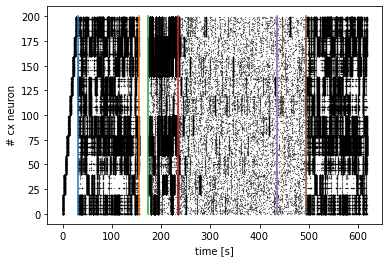

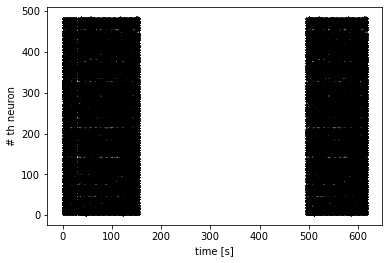

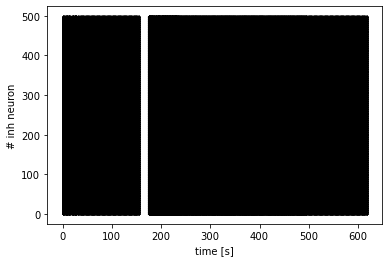

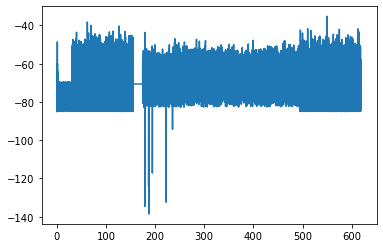

In [6]:
# PLOT 
N_Example = 50

StartTest1_Pre = 3*10. + 1.5
EndTest1_Pre = StartTest1_Pre + 2.5*N_Example -1.5

StartSleep1_Pre = EndTest1_Pre + 3. + 1.5 + 15.
EndSleep1_Pre = StartSleep1_Pre + 60.

StartSleep1_Post = EndSleep1_Pre + 200.
EndSleep1_Post = StartSleep1_Post + 60.

StartTest1_Post = EndSleep1_Post
EndTest1_Post = StartTest1_Post + 2.5*N_Example -1.5


plt.figure()
plt.plot(x_exc, y_exc, '.', color = [0., 0., 0.], markersize=0.4)
plt.xlabel('time [s]')
plt.ylabel('# cx neuron')
#plt.xlim(470., 500)
plt.plot([StartTest1_Pre, StartTest1_Pre], [0, N_Cx])
plt.plot([EndTest1_Pre, EndTest1_Pre], [0, N_Cx])
plt.plot([StartSleep1_Pre, StartSleep1_Pre], [0,N_Cx])
plt.plot([EndSleep1_Pre, EndSleep1_Pre], [0, N_Cx])
plt.plot([StartSleep1_Post, StartSleep1_Post], [0,N_Cx])
plt.plot([EndSleep1_Post, EndSleep1_Post], [0, N_Cx])
#plt.ylim([140,200])

plt.figure()
plt.plot(x_th, y_th, '.', color = [0., 0., 0.], markersize=0.4)
plt.xlabel('time [s]')
plt.ylabel('# th neuron')
#plt.xlim(0., 300.)
#plt.ylim([140,200])
#plt.plot([StartTest1_Pre, StartTest1_Pre], [0, 200])
#plt.plot([EndTest1_Pre, EndTest1_Pre], [0, 200])

plt.figure()
plt.plot(x_inh, y_inh, '.', color = [0., 0., 0.], markersize=0.4)
plt.xlabel('time [s]')
plt.ylabel('# inh neuron')

idx = np.where(m_idx == 0)[0]
print(idx)
plt.figure()
plt.plot(m_t[idx], m_V[idx])

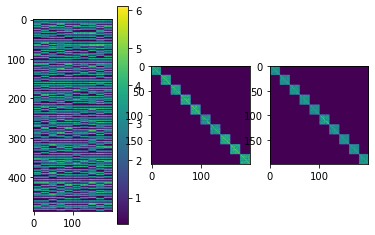

In [7]:
plt.figure()
plt.subplot(1,3,1)

plt.imshow(weight_matrix_th_cx)
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(weight_matrix_cx_cx1_Pre)
plt.subplot(1,3,3)
plt.imshow(weight_matrix_cx_cx1_Post)
#plt.colorbar()

### TEST 1 PRE

In [8]:
# Th-Current, Cx-firing rate computation


def Current_Fr(events_cx, events_th, events_inh, m_V, m_t, m_w, m_idx, start, dt, Delta, N_Example, Matrix_cx_cx, W_inh_exc, Matrix_th_cx = weight_matrix_th_cx):

    
    I = np.zeros([N_Cx, N_Example])
    I_inh = np.zeros([N_Cx, N_Example])

    Fr_cx = np.zeros([N_Cx, N_Example]) 
    Fr_th = np.zeros([N_Th, N_Example]) 
    Fr_inh = np.zeros([N_Inh, N_Example]) 

    M_V = np.zeros([N_Cx, N_Example]) 
    M_W = np.zeros([N_Cx, N_Example]) 

    for i_test in range(0, N_Example): # per ogni test
        end = start + dt

        temp_times_idx_m1 = m_t >= start
        temp_times_idx_m2 = m_t < end
        temp_times_idx_m = temp_times_idx_m1 & temp_times_idx_m2
            
        for neur_th in range(0, N_Th): # per ogni neurone talamico

            # calcolo la corrente in ingresso dal talamo
            temp1 = events_th[neur_th] >= start
            temp2 = events_th[neur_th] < end
            idx = np.where(temp1 & temp2)[0]
            Fr_th[neur_th, i_test] = np.float64(len(events_th[neur_th][idx]))/dt

        for neur_inh in range(0, N_Inh): # per ogni neurone talamico

            # calcolo la corrente in ingresso dal talamo
            temp1 = events_inh[neur_inh] >= start
            temp2 = events_inh[neur_inh] < end
            idx = np.where(temp1 & temp2)[0]
            Fr_inh[neur_inh, i_test] = np.float64(len(events_inh[neur_inh][idx]))/dt
            
        for neur_cx in range(0, N_Cx): # per ogni neurone corticale

            # calcolo il f.r. del neurone corticale
            temp1 = events_cx[neur_cx] >= start
            temp2 = events_cx[neur_cx] < end 
            idx = np.where(temp1 & temp2)[0]
            Fr_cx[neur_cx, i_test] = np.float64(len(events_cx[neur_cx][idx]))/dt

            # calcolo il potenziale del neurone corticale
            temp_cx_idx_m = m_idx == neur_cx
            temp_m = np.where(temp_cx_idx_m & temp_times_idx_m)[0]
            M_V[neur_cx, i_test] = np.mean(m_V[temp_m])
            
            # calcolo la adaptation current del neurone corticale
            M_W[neur_cx, i_test] = np.mean(m_w[temp_m])
            
            # contributo talamico alla corrente    
            I[neur_cx, i_test] = np.sum(Fr_th[:,i_test]*Matrix_th_cx[:, neur_cx])
            I[neur_cx, i_test] =  I[neur_cx, i_test] + np.sum(Fr_cx[:,i_test]*Matrix_cx_cx[neur_cx, :])
            I_inh[neur_cx, i_test] =  I[neur_cx, i_test] + np.sum(Fr_inh[:,i_test]*W_inh_exc)

        start = end + Delta     
    return I, I_inh, Fr_cx, M_V, M_W


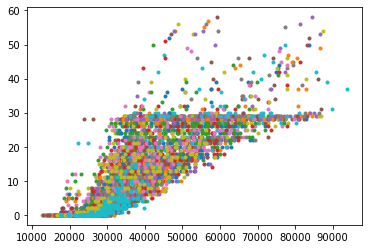

In [9]:
# TEST Pre Sleep dopo 1 esempio per categoria

TimeTest = 1. #dt
Pause = 1.5 #Delta
#start = StartTest1_Pre
N_Test= 50

I_test1_PreSleep, I_Inh_test1_PreSleep, Fr_cx_Test1_PreSleep, M_V_cx_Test1_PreSleep, M_W_cx_Test1_PreSleep = Current_Fr(evt_cx, evt_th, evt_inh, m_V, m_t, m_w, m_idx, StartTest1_Pre, TimeTest, Pause, N_Test, weight_matrix_cx_cx1_Pre,  W_inh_exc=-64.)

plt.figure()
plt.plot(I_test1_PreSleep, Fr_cx_Test1_PreSleep, '.')



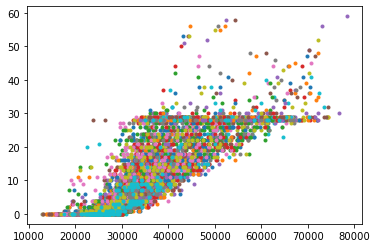

In [10]:
# TEST Post Sleep dopo 1 esempio per categoria

TimeTest = 1. #dt
Pause = 1.5 #Delta
N_Test= 50

I_test1_PostSleep, I_Inh_test1_PostSleep, Fr_cx_Test1_PostSleep, M_V_cx_Test1_PostSleep, M_W_cx_Test1_PostSleep = Current_Fr(evt_cx, evt_th, evt_inh, m_V, m_t, m_w, m_idx, StartTest1_Post, TimeTest, Pause, N_Test, weight_matrix_cx_cx1_Post,  W_inh_exc=-64.)

plt.figure()
plt.plot(I_test1_PostSleep, Fr_cx_Test1_PostSleep, '.')


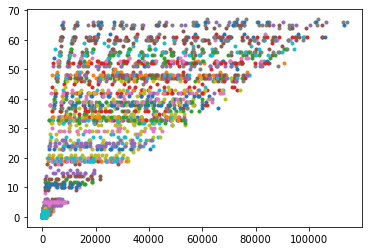

In [11]:
# INIZIO Sleep dopo 1 esempio per categoria

Deltat = 1. #0.2 #dt
Pause = 0. #Delta
N_Points = np.int32((EndSleep1_Pre - StartSleep1_Pre)/Deltat)

I_Sleep1_Inizio, I_Inh_Sleep1_Inizio, Fr_cx_Sleep1_Inizio, M_V_cx_Sleep1_Inizio, M_W_cx_Sleep1_Inizio = Current_Fr(evt_cx, evt_th, evt_inh, m_V, m_t, m_w, m_idx, StartSleep1_Pre, Deltat, Pause, N_Points, weight_matrix_cx_cx1_Pre,  W_inh_exc=-0.5)

plt.figure()
plt.plot(I_Sleep1_Inizio, Fr_cx_Sleep1_Inizio, '.')


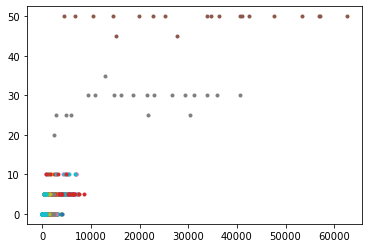

In [12]:
# FINE Sleep dopo 1 esempio per categoria

Deltat = 0.2 #dt
Pause = 0. #Delta
N_Points = np.int32((EndSleep1_Post - StartSleep1_Post)/Deltat)

I_Sleep1_Fine, I_Inh_Sleep1_Fine, Fr_cx_Sleep1_Fine, M_V_cx_Sleep1_Fine, M_W_cx_Sleep1_Fine = Current_Fr(evt_cx, evt_th, evt_inh, m_V, m_t, m_w, m_idx, StartSleep1_Post, Deltat, Pause, N_Points, weight_matrix_cx_cx1_Post,  W_inh_exc=-0.5)

plt.figure()
plt.plot(I_Sleep1_Fine, Fr_cx_Sleep1_Fine, '.')


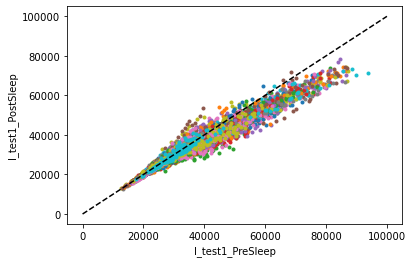

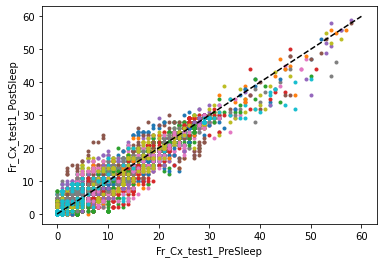

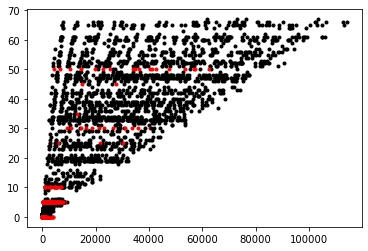

In [13]:
plt.figure()
plt.plot(I_test1_PreSleep, I_test1_PostSleep, '.')
plt.plot([0, 100000],[0, 100000],  '--', color = 'black')
plt.xlabel('I_test1_PreSleep')
plt.ylabel('I_test1_PostSleep')

plt.figure()
plt.plot(Fr_cx_Test1_PreSleep, Fr_cx_Test1_PostSleep, '.')
plt.plot([0, 60],[0, 60],  '--', color = 'black')
plt.xlabel('Fr_Cx_test1_PreSleep')
plt.ylabel('Fr_Cx_test1_PostSleep')


plt.figure()
for cx in range(0, N_Cx):
    plt.plot(I_Sleep1_Inizio[cx], Fr_cx_Sleep1_Inizio[cx], '.', color = 'black', label='Inizio')
    plt.plot(I_Sleep1_Fine[cx], Fr_cx_Sleep1_Fine[cx], '.', color = 'red', label='Fine')
#plt.legend()
#plt.plot(I_Sleep1_Inizio, I_Sleep1_Fine, '.')
#plt.plot([0, 100000],[0, 100000],  '--', color = 'black')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


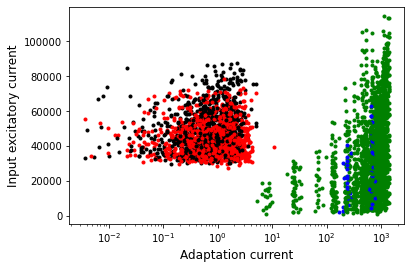

In [14]:
# Plot 1.1: w vs corrente senza inh
plt.figure()

for neur_cx in range(0, N_Cx):
    print(neur_cx)
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]
    idx_sleep_post = np.where(Fr_cx_Sleep1_Fine[neur_cx] > 10.)[0]
    idx_sleep_pre = np.where(Fr_cx_Sleep1_Inizio[neur_cx] > 10.)[0]

    plt.plot(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
    plt.plot(M_W_cx_Test1_PostSleep[neur_cx][idx_post], I_test1_PostSleep[neur_cx][idx_post], '.', color = 'red')
    plt.plot(M_W_cx_Sleep1_Inizio[neur_cx][idx_sleep_pre], I_Sleep1_Inizio[neur_cx][idx_sleep_pre], '.', color = 'green')
    plt.plot(M_W_cx_Sleep1_Fine[neur_cx][idx_sleep_post], I_Sleep1_Fine[neur_cx][idx_sleep_post], '.', color = 'blue')

plt.xlabel('Adaptation current', fontsize = 12.)
plt.ylabel('Input excitatory current', fontsize = 12.)
plt.xscale('log')

Text(0, 0.5, 'Input current')

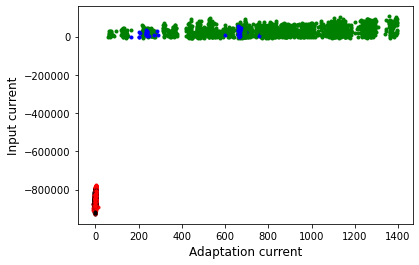

In [15]:
# Plot 1.2: w vs corrente con inh
plt.figure()

for neur_cx in range(0, N_Cx):
    #idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]
    idx_sleep_post = np.where(Fr_cx_Sleep1_Fine[neur_cx] > 10.)[0]
    idx_sleep_pre = np.where(Fr_cx_Sleep1_Inizio[neur_cx] > 20.)[0]
    
    
    plt.plot(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_Inh_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
    plt.plot(M_W_cx_Test1_PostSleep[neur_cx][idx_post], I_Inh_test1_PostSleep[neur_cx][idx_post], '.', color = 'red')
    plt.plot(M_W_cx_Sleep1_Inizio[neur_cx][idx_sleep_pre], I_Inh_Sleep1_Inizio[neur_cx][idx_sleep_pre], '.', color = 'green')
    plt.plot(M_W_cx_Sleep1_Fine[neur_cx][idx_sleep_post], I_Inh_Sleep1_Fine[neur_cx][idx_sleep_post], '.', color = 'blue')

plt.xlabel('Adaptation current', fontsize = 12.)
plt.ylabel('Input current', fontsize = 12.)


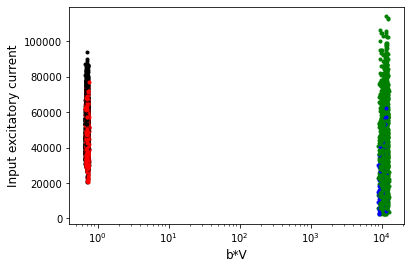

In [16]:
# Plot 2.1: b*V vs corrente senza inh
plt.figure()

for neur_cx in range(0, N_Cx):
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]
    idx_sleep_post = np.where(Fr_cx_Sleep1_Fine[neur_cx] > 10.)[0]
    idx_sleep_pre = np.where(Fr_cx_Sleep1_Inizio[neur_cx] > 20.)[0]
    
    
    plt.plot(np.abs(M_V_cx_Test1_PreSleep[neur_cx][idx_pre]*0.01), I_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
    plt.plot(np.abs(M_V_cx_Test1_PostSleep[neur_cx][idx_post]*0.01), I_test1_PostSleep[neur_cx][idx_post], '.', color = 'red')
    plt.plot(np.abs(M_V_cx_Sleep1_Inizio[neur_cx][idx_sleep_pre]*150.), I_Sleep1_Inizio[neur_cx][idx_sleep_pre], '.', color = 'green')
    plt.plot(np.abs(M_V_cx_Sleep1_Fine[neur_cx][idx_sleep_post]*150.), I_Sleep1_Fine[neur_cx][idx_sleep_post], '.', color = 'blue')

plt.xlabel('b*V', fontsize = 12.)
plt.ylabel('Input excitatory current', fontsize = 12.)
plt.xscale('Log')

Text(0, 0.5, 'Input current')

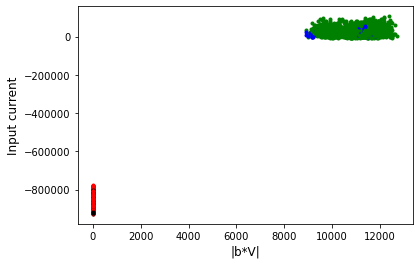

In [17]:
# Plot 2.1: b*V vs corrente con inh
plt.figure()

for neur_cx in range(0, N_Cx):
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]
    idx_sleep_post = np.where(Fr_cx_Sleep1_Fine[neur_cx] > 10.)[0]
    idx_sleep_pre = np.where(Fr_cx_Sleep1_Inizio[neur_cx] > 20.)[0]
    
    plt.plot(np.abs(M_V_cx_Test1_PreSleep[neur_cx][idx_pre]*0.01), I_Inh_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
    plt.plot(np.abs(M_V_cx_Test1_PostSleep[neur_cx][idx_post]*0.01), I_Inh_test1_PostSleep[neur_cx][idx_post], '.', color = 'red')
    plt.plot(np.abs(M_V_cx_Sleep1_Inizio[neur_cx][idx_sleep_pre]*150.), I_Inh_Sleep1_Inizio[neur_cx][idx_sleep_pre], '.', color = 'green')
    plt.plot(np.abs(M_V_cx_Sleep1_Fine[neur_cx][idx_sleep_post]*150.), I_Inh_Sleep1_Fine[neur_cx][idx_sleep_post], '.', color = 'blue')

plt.xlabel('|b*V|', fontsize = 12.)
plt.ylabel('Input current', fontsize = 12.)


<ipython-input-95-e7ebc83dbc5e>:60: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([-10., 1000])


12383.474851549186


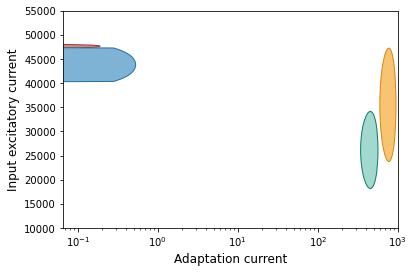

In [95]:
# Plot 3.1 b vs mean current senza inh
from matplotlib import patches

fig = plt.figure()
ax = fig.gca()

temp_I_test1_PreSleep=[]
temp_I_test1_PostSleep=[]
temp_I_Sleep1_Inizio=[]
temp_I_Sleep1_Fine=[]

temp_MW_test1_PreSleep = []
temp_MW_test1_PostSleep = []
temp_MW_Sleep1_Inizio = []
temp_MW_Sleep1_Fine = []

for neur_cx in range(0, N_Cx):
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]
    idx_sleep_post = np.where(Fr_cx_Sleep1_Fine[neur_cx] > 10.)[0]
    idx_sleep_pre = np.where(Fr_cx_Sleep1_Inizio[neur_cx] > 10.)[0]
    
    temp_I_test1_PreSleep.extend(I_test1_PreSleep[neur_cx][idx_pre])
    temp_I_test1_PostSleep.extend(I_test1_PostSleep[neur_cx][idx_post])
    temp_I_Sleep1_Inizio.extend(I_Sleep1_Inizio[neur_cx][idx_sleep_pre])
    temp_I_Sleep1_Fine.extend(I_Sleep1_Fine[neur_cx][idx_sleep_post])
    
    temp_MW_test1_PreSleep.extend(M_W_cx_Test1_PreSleep[neur_cx][idx_pre])
    temp_MW_test1_PostSleep.extend(M_W_cx_Test1_PostSleep[neur_cx][idx_post])
    temp_MW_Sleep1_Inizio.extend(M_W_cx_Sleep1_Inizio[neur_cx][idx_sleep_pre])
    temp_MW_Sleep1_Fine.extend(M_W_cx_Sleep1_Fine[neur_cx][idx_sleep_post])


    #plt.plot(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
    #plt.plot(M_W_cx_Test1_PostSleep[neur_cx][idx_post], I_test1_PostSleep[neur_cx][idx_post], '.', color = 'red')
    #plt.plot(M_W_cx_Sleep1_Inizio[neur_cx][idx_sleep_pre], I_Sleep1_Inizio[neur_cx][idx_sleep_pre], '.', color = 'green')
    #plt.plot(M_W_cx_Sleep1_Fine[neur_cx][idx_sleep_post], I_Sleep1_Fine[neur_cx][idx_sleep_post], '.', color = 'blue')

    
circle_Test1_PreSleep = patches.Ellipse((np.mean(temp_MW_test1_PreSleep), np.mean(temp_I_test1_PreSleep)), width = np.std(temp_MW_test1_PreSleep), height=np.std(temp_I_test1_PreSleep), edgecolor= [169./255., 50./255., 38./255.], facecolor = [217./255., 136./255., 128./255.])
circle_Test1_PostSleep = patches.Ellipse((np.mean(temp_MW_test1_PostSleep), np.mean(temp_I_test1_PostSleep)), width = np.std(temp_MW_test1_PostSleep), height=np.std(temp_I_test1_PostSleep), edgecolor= [36./255., 113./255., 163./255.], facecolor = [127./255., 179./255., 213./255.])
circle_Sleep1_Inizio = patches.Ellipse((np.mean(temp_MW_Sleep1_Inizio), np.mean(temp_I_Sleep1_Inizio)), width = np.std(temp_MW_Sleep1_Inizio), height=np.std(temp_I_Sleep1_Inizio), edgecolor= [214./255., 137./255., 16./255.], facecolor = [248./255., 196./255., 113./255.])
circle_Sleep1_Fine = patches.Ellipse((np.mean(temp_MW_Sleep1_Fine), np.mean(temp_I_Sleep1_Fine)), width = np.std(temp_MW_Sleep1_Fine), height=np.std(temp_I_Sleep1_Fine), edgecolor= [17./255., 122./255., 101./255.], facecolor = [162./255., 217./255., 206./255.])

#circle_Sleep1_Inizio = plt.Circle((150., np.mean(temp_I_Sleep1_Inizio)), np.std(temp_I_Sleep1_Inizio)/200., color = 'green')
#circle_Sleep1_Fine = plt.Circle((150., np.mean(temp_I_Sleep1_Fine)), np.std(temp_I_Sleep1_Fine)/100., color = 'blue')

#plt.plot(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')

ax.add_patch(circle_Test1_PreSleep)
ax.add_patch(circle_Test1_PostSleep)
ax.add_patch(circle_Sleep1_Inizio)
ax.add_patch(circle_Sleep1_Fine)

plt.xlabel('Adaptation current', fontsize = 12.)
plt.ylabel('Input excitatory current', fontsize = 12.)
plt.xscale('Log')
#plt.yscale('Log')
plt.xlim([-10., 1000])
plt.ylim([10000, 55000])
print(np.std(temp_I_test1_PreSleep))
#plt.savefig(save_path + 'Points_Ellipses_1es_xLog.eps', format = 'eps')



    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

(4119, 2)
(4119,)
4
1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


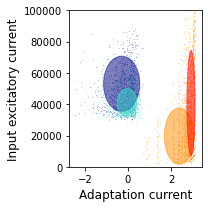

In [233]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange', 'red']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        #ax.set_aspect('equal', 'datalim')

temp_MW_test1_PreSleep = np.array(temp_MW_test1_PreSleep)
temp_I_test1_PreSleep = np.array(temp_I_test1_PreSleep)
idx = np.where(np.array(temp_MW_test1_PreSleep)>0)[0]
X_train1 = [np.log10(temp_MW_test1_PreSleep[idx]), temp_I_test1_PreSleep[idx]] #iris.data[train_index]
y_train1 = np.zeros(len(X_train1[0]))

temp_MW_test1_PostSleep = np.array(temp_MW_test1_PostSleep)
temp_I_test1_PostSleep = np.array(temp_I_test1_PostSleep)
idx = np.where(np.array(temp_MW_test1_PostSleep)>0)[0]
X_train2 = [np.log10(temp_MW_test1_PostSleep[idx]), temp_I_test1_PostSleep[idx]] #iris.data[train_index]
y_train2 = np.ones(len(X_train2[0]))

temp_MW_Sleep1_Inizio= np.array(temp_MW_Sleep1_Inizio)
temp_I_Sleep1_Inizio= np.array(temp_I_Sleep1_Inizio)
idx = np.where(np.array(temp_MW_Sleep1_Inizio)>0)[0]
X_train3 = [np.log10(temp_MW_Sleep1_Inizio[idx]), temp_I_Sleep1_Inizio[idx]]
y_train3 = np.ones(len(X_train3[0]))*2

temp_MW_Sleep1_Fine= np.array(temp_MW_Sleep1_Fine)
temp_I_Sleep1_Fine= np.array(temp_I_Sleep1_Fine)
idx = np.where(np.array(temp_MW_Sleep1_Fine)>0)[0]
X_train4 = [np.log10(temp_MW_Sleep1_Fine[idx]), temp_I_Sleep1_Fine[idx]]
y_train4 = np.ones(len(X_train4[0]))*3


X_train = np.concatenate([X_train1, X_train2], axis = 1)
X_train = np.concatenate([X_train, X_train3], axis = 1)
X_train = np.concatenate([X_train, X_train4], axis = 1)
y_train = np.concatenate([y_train1, y_train2])
y_train = np.concatenate([y_train, y_train3])
y_train = np.concatenate([y_train, y_train4])

X_train = X_train.T
print(np.shape(X_train))
print(np.shape(y_train))
#y_train = iris.target[train_index]

n_classes = len(np.unique(y_train))
print(n_classes)

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=2000, random_state=0)
              for cov_type in ['diag']}

n_estimators = len(estimators)
print(n_estimators)
plt.figure(figsize=(3, 3))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)
    h = plt.subplot()
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X_train[y_train == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.4, edgecolors='none', facecolors=color, marker = 'o')
        
    #h.set_xlim([0.001, 1500])
    h.set_ylim([0,100000])
    #h.set_xscale('log')


    
    #plt.xticks(())
    #plt.yticks(())
    #plt.title(name)

#plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))

#plt.show()
plt.xlabel('Adaptation current', fontsize = 12.)
plt.ylabel('Input excitatory current', fontsize = 12.)
plt.tight_layout()
#plt.savefig(save_path + 'Points_GridDiag_1es_xLog.eps', format = 'eps')
#plt.savefig(save_path + 'Points_GridDiag_1es_xLog.png', format = 'png', dpi=300)

plt.savefig(save_path + 'PointsScatter_GridDiag_1es_xLog.eps', format = 'eps')
plt.savefig(save_path + 'PointsScatter_GridDiag_1es_xLog.png', format = 'png', dpi=300)



    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

4
1


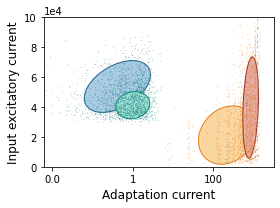

In [265]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

#colors = ['navy', 'turquoise', 'darkorange', 'red']
colors = [[169./255., 204./255., 227./255.], [163./255., 228./255., 215./255.], [250./255., 215./255., 160./255.], [230./255., 176./255., 170./255.]]
edge = [[31./255., 97./255., 141./255.], [20./255., 143./255., 119./255.], [230./255., 126./255., 34./255.], [146./255., 43./255., 33./255.]]

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, facecolor=color, edgecolor=edge[n])
        ell.set_clip_box(ax.bbox)
        #ell.set_alpha(0.5)
        ax.add_artist(ell)
        #ax.set_aspect('equal', 'datalim')



temp_MW_test1_PreSleep = np.array(temp_MW_test1_PreSleep)
temp_I_test1_PreSleep = np.array(temp_I_test1_PreSleep)
idx = np.where(np.array(temp_MW_test1_PreSleep)>0.0001)[0]
X_train1 = [np.log10(temp_MW_test1_PreSleep[idx]), temp_I_test1_PreSleep[idx]] #iris.data[train_index]
y_train1 = np.zeros(len(X_train1[0]))

temp_MW_test1_PostSleep = np.array(temp_MW_test1_PostSleep)
temp_I_test1_PostSleep = np.array(temp_I_test1_PostSleep)
idx = np.where(np.array(temp_MW_test1_PostSleep)>0.0001)[0]
X_train2 = [np.log10(temp_MW_test1_PostSleep[idx]), temp_I_test1_PostSleep[idx]] #iris.data[train_index]
y_train2 = np.ones(len(X_train2[0]))

temp_MW_Sleep1_Inizio= np.array(temp_MW_Sleep1_Inizio)
temp_I_Sleep1_Inizio= np.array(temp_I_Sleep1_Inizio)
idx = np.where(np.array(temp_MW_Sleep1_Inizio)>0.0001)[0]
X_train3 = [np.log10(temp_MW_Sleep1_Inizio[idx]), temp_I_Sleep1_Inizio[idx]]
y_train3 = np.ones(len(X_train3[0]))*2

temp_MW_Sleep1_Fine= np.array(temp_MW_Sleep1_Fine)
temp_I_Sleep1_Fine= np.array(temp_I_Sleep1_Fine)
idx = np.where(np.array(temp_MW_Sleep1_Fine)>0.0001)[0]
X_train4 = [np.log10(temp_MW_Sleep1_Fine[idx]), temp_I_Sleep1_Fine[idx]]
y_train4 = np.ones(len(X_train4[0]))*3


X_train = np.concatenate([X_train1, X_train2], axis = 1)
X_train = np.concatenate([X_train, X_train3], axis = 1)
X_train = np.concatenate([X_train, X_train4], axis = 1)
y_train = np.concatenate([y_train1, y_train2])
y_train = np.concatenate([y_train, y_train3])
y_train = np.concatenate([y_train, y_train4])

X_train = X_train.T

#y_train = iris.target[train_index]

n_classes = len(np.unique(y_train))
print(n_classes)

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=2000, random_state=0)
              for cov_type in ['full']}

n_estimators = len(estimators)
print(n_estimators)
plt.figure(figsize=(4, 3))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)
    h = plt.subplot()
    make_ellipses(estimator, h)

    h.set_xlim([-2.2, 3.5])
    h.set_ylim([0,100000])
    #h.set_xscale('log')
    

    
    #plt.xticks(())
    #plt.yticks(())
    #plt.title(name)


#plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))
for n, color in enumerate(colors):
    data = X_train[y_train == n]
    plt.scatter(data[:, 0], data[:, 1], s=0.4, edgecolors='none', facecolors=edge[n], marker = 'o', zorder=2)

#plt.show()
plt.xticks((-2, 0, 2), labels=(np.round(10**(-2), 1), np.round(10**(0), 1), np.round(10**(2), 1)))
#plt.yticks((20000, 40000, 60000, 80000, 100000), labels=(2, 4, 6, 8, 10))
plt.ticklabel_format(axis="y", style="sci", scilimits=(4,4))

plt.xlabel('Adaptation current', fontsize = 12.)
plt.ylabel('Input excitatory current', fontsize = 12.)
plt.tight_layout()
#plt.savefig(save_path + 'Points_GridFull_1es_xLog.eps', format = 'eps')
#plt.savefig(save_path + 'Points_GridFull_1es_xLog.png', format = 'png', dpi=300)
plt.savefig(save_path + 'PointsScatter_GridFull_1es_xLog.eps', format = 'eps')
plt.savefig(save_path + 'PointsScatter_GridFull_1es_xLog.png', format = 'png', dpi=600)


In [99]:
BINWIDTH = 0.03
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
#circle_Test1_PreSleep = patches.Ellipse((np.mean(temp_MW_test1_PreSleep), np.mean(temp_I_test1_PreSleep)), width = np.std(temp_MW_test1_PreSleep), height=np.std(temp_I_test1_PreSleep), edgecolor= [169./255., 50./255., 38./255.], facecolor = [217./255., 136./255., 128./255.])

print(np.mean(temp_MW_test1_PreSleep))
circle_Test1_PreSleep = patches.Ellipse((np.log10(np.abs(np.mean(temp_MW_test1_PreSleep))), np.mean(temp_I_test1_PreSleep)), width = np.log10(np.std(temp_MW_test1_PreSleep)), height=np.std(temp_I_test1_PreSleep), edgecolor= [169./255., 50./255., 38./255.], facecolor = [217./255., 136./255., 128./255.])
circle_Test1_PostSleep = patches.Ellipse((np.log10(np.abs(np.mean(temp_MW_test1_PostSleep))), np.mean(temp_I_test1_PostSleep)), width = np.log10(np.std(temp_MW_test1_PostSleep)), height=np.std(temp_I_test1_PostSleep), edgecolor= [36./255., 113./255., 163./255.], facecolor = [127./255., 179./255., 213./255.])
circle_Sleep1_Inizio = patches.Ellipse((np.log10(np.mean(temp_MW_Sleep1_Inizio)), np.mean(temp_I_Sleep1_Inizio)), width = np.log10(np.std(temp_MW_Sleep1_Inizio)), height=np.std(temp_I_Sleep1_Inizio), edgecolor= [214./255., 137./255., 16./255.], facecolor = [248./255., 196./255., 113./255.])
circle_Sleep1_Fine = patches.Ellipse((np.log10(np.mean(temp_MW_Sleep1_Fine)), np.mean(temp_I_Sleep1_Fine)), width = np.log10(np.std(temp_MW_Sleep1_Fine)), height=np.std(temp_I_Sleep1_Fine), edgecolor= [17./255., 122./255., 101./255.], facecolor = [162./255., 217./255., 206./255.])

#circle_Sleep1_Inizio = plt.Circle((150., np.mean(temp_I_Sleep1_Inizio)), np.std(temp_I_Sleep1_Inizio)/200., color = 'green')
#circle_Sleep1_Fine = plt.Circle((150., np.mean(temp_I_Sleep1_Fine)), np.std(temp_I_Sleep1_Fine)/100., color = 'blue')

#plt.plot(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
ax_scatter.add_artist(circle_Test1_PreSleep)
ax_scatter.add_artist(circle_Test1_PostSleep)
ax_scatter.add_artist(circle_Sleep1_Inizio)
ax_scatter.add_artist(circle_Sleep1_Fine)

#ax_scatter.scatter(M_W_cx_Test1_PreSleep[0][0:10], I_test1_PreSleep[0][0:10])
#ax_scatter.add_patch(circle_Test1_PostSleep)
#ax_scatter.add_patch(circle_Sleep1_Inizio)
#ax_scatter.add_patch(circle_Sleep1_Fine)


# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([temp_MW_test1_PreSleep, temp_I_test1_PreSleep]).max()/ binwidth) * binwidth

#ax_scatter.set_xlim((-lim, lim))
#ax_scatter.set_ylim((-lim, lim))

ax_scatter.set_xlim((-1, 5.))
ax_scatter.set_ylim((15000, 55000))


bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(np.log10(temp_MW_test1_PreSleep), bins=bins, edgecolor= [169./255., 50./255., 38./255.], facecolor = [217./255., 136./255., 128./255.])
ax_histx.hist(np.log10(temp_MW_test1_PostSleep), bins=bins, edgecolor= [36./255., 113./255., 163./255.], facecolor = [127./255., 179./255., 213./255.])
ax_histx.hist(np.log10(temp_MW_Sleep1_Inizio), bins=bins, edgecolor= [214./255., 137./255., 16./255.], facecolor = [248./255., 196./255., 113./255.])
ax_histx.hist(np.log10(temp_MW_Sleep1_Fine), bins=bins, edgecolor= [17./255., 122./255., 101./255.], facecolor = [162./255., 217./255., 206./255.])

ax_histy.hist(np.log10(temp_I_test1_PreSleep), orientation='horizontal', bins=bins, edgecolor= [169./255., 50./255., 38./255.], facecolor = [217./255., 136./255., 128./255.])
ax_histy.hist(np.log10(temp_I_test1_PostSleep), orientation='horizontal', bins=bins, edgecolor= [36./255., 113./255., 163./255.], facecolor = [127./255., 179./255., 213./255.])
ax_histy.hist(np.log10(temp_I_Sleep1_Inizio), orientation='horizontal', bins=bins, edgecolor= [214./255., 137./255., 16./255.], facecolor = [248./255., 196./255., 113./255.])
ax_histy.hist(np.log10(temp_I_Sleep1_Fine), orientation='horizontal', bins=bins, edgecolor= [17./255., 122./255., 101./255.], facecolor = [162./255., 217./255., 206./255.])

#ax_histy.hist(temp_I_test1_PreSleep, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())


-0.6273648939589703


<ipython-input-99-e474eb2dc66b>:58: RuntimeWarning: invalid value encountered in log10
  ax_histx.hist(np.log10(temp_MW_test1_PreSleep), bins=bins, edgecolor= [169./255., 50./255., 38./255.], facecolor = [217./255., 136./255., 128./255.])
<ipython-input-99-e474eb2dc66b>:59: RuntimeWarning: invalid value encountered in log10
  ax_histx.hist(np.log10(temp_MW_test1_PostSleep), bins=bins, edgecolor= [36./255., 113./255., 163./255.], facecolor = [127./255., 179./255., 213./255.])


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc51fc9da60> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Plot 3.2 b vs mean current con inh
plt.figure()
ax = fig.gca()


temp_I = []
for neur_cx in range(0, N_Cx):
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    #idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]

    temp_I.extend(I_Inh_test1_PreSleep[neur_cx][idx_pre])
    
circle_Test1_PreSleep = plt.Circle((0.01, np.mean(temp_I)), np.std(temp_I))

#plt.plot(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
ax.add_patch(circle_Test1_PreSleep)

plt.xlabel('Adaptation current', fontsize = 12.)
plt.ylabel('Input excitatory current', fontsize = 12.)


In [ ]:
# SCATTER CON F.r CON W

# Plot 3.2 b vs mean current con inh
plt.figure()
ax = fig.gca()

temp_I = []

for neur_cx in range(0, N_Cx):
    idx_pre = np.where(Fr_cx_Test1_PreSleep[neur_cx] > 10.)[0]
    #idx_post = np.where(Fr_cx_Test1_PostSleep[neur_cx] > 10.)[0]
    temp_I.extend(I_test1_PreSleep[neur_cx][idx_pre])
    plt.scatter(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_test1_PreSleep[neur_cx][idx_pre], s=0.2, c = Fr_cx_Test1_PreSleep[neur_cx][idx_pre], cmap='magma')

#circle_Test1_PreSleep = plt.Circle((0.01, np.mean(temp_I)), np.std(temp_I), color='black')
#print(np.std(temp_I))
#plt.plot(M_W_cx_Test1_PreSleep[neur_cx][idx_pre], I_test1_PreSleep[neur_cx][idx_pre], '.', color = 'black')
#ax.add_patch(circle_Test1_PreSleep)

plt.xlabel('Adaptation current', fontsize = 12.)
plt.ylabel('Input excitatory current', fontsize = 12.)

In [ ]:
plt.figure()
for cx in range(0, N_Cx):
    plt.plot(150.*M_V_cx_Sleep1_Inizio[cx], Fr_cx_Sleep1_Inizio[cx], '.')


In [21]:

N_Example = 50

StartTest1_Pre = 3*10. + 1.5
EndTest1_Pre = StartTest1_Pre + 2.5*N_Example -1.5
StartSleep1_Pre = EndTest1_Pre + 3. + 1.5
EndSleep1_Pre = StartSleep1_Pre + 60.
StartSleep1_Post = EndSleep1_Pre + 50.
EndSleep1_Post = StartSleep1_Post + 60.
StartTest1_Post = EndSleep1_Post
EndTest1_Post = StartTest1_Post + 2.5*N_Example -1.5

StartTest2_Pre = 3*10. + 1.5 + EndTest1_Post + 1.5
EndTest2_Pre = StartTest2_Pre + 2.5*N_Example -1.5
StartSleep2_Pre = EndTest2_Pre + 3. + 1.5
EndSleep2_Pre = StartSleep2_Pre + 60.
StartSleep2_Post = EndSleep2_Pre + 100.
EndSleep2_Post = StartSleep2_Post + 60.
StartTest2_Post = EndSleep2_Post
EndTest2_Post = StartTest2_Post + 2.5*N_Example -1.5

